In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls
!pwd
!cd /content/drive
print('done')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
drive  sample_data
/content
done


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
import nltk
import re
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
stopwords=set(stopwords.words('english'))


In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
data=pd.read_csv('/content/drive/My Drive/RK_ALDA_PROJ/Final Submission/K-Means/extractive.csv')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 

In [0]:
dic={}
for e in stopwords:
  dic[e]=0

In [0]:
def preprocessing(x):
  tokens=word_tokenize(x)
  filter1 = [re.sub('[0-9]','', i) for i in tokens]
  filter2=[lemmatizer.lemmatize(w.lower()) for w in filter1 if(not w in dic and w.isalpha())]
  return filter2
  

In [0]:
import gensim
from gensim.utils import simple_preprocess

In [0]:

# for i in range(2):
#   x=data.loc[i,"text"].lower().split('\n')
#   y = ' '.join(x).replace('  ', ' ')
#   input_sentence = []
#   for sentence in y.split('.'):
#     input_sentence.append([sentence])
#   processed_docs = documents['headline_text'].map(preprocess)
#   processed_docs[:10]
#   dictionary = gensim.corpora.Dictionary(input_sentence)
#   count = 0
#   for k, v in dictionary.iteritems():
#     print(k, v)
#     count += 1
#     if count > 10:
#         break
#   print("LOLLLLLL\n\n\n\n")
#   dictionary.filter_extremes(no_below=0, no_above=0.01, keep_n=100000)
#   print(len(dictionary))
#   count = 0
#   for k, v in dictionary.iteritems():
#     print(k, v)
#     count += 1
#     if count > 10:
#       break

In [0]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
gen_summaries=[]
for i in range(5000):
  print(i)
  input_sentence = []
  count_vectorizer = CountVectorizer(stop_words='english')
  # Fit and transform the processed titles
  input_sentence=[]
  x=data.loc[i,"text"].lower().split('\n')
  y = ' '.join(x).replace('  ', ' ')
  temp=pd.DataFrame(columns=['new'])
  for sentence in y.split('.'):
    # input_sentence.append([sentence])
    # print(inp_sentence)
    if len(sentence)>10:
      input_sentence.append([sentence])
      temp=temp.append({'new': sentence},ignore_index=True)
  # input_sentence
  # input_sentence.remove([])

  # val=data.loc[0, 'text']


  # temp=temp.append({'new': val},ignore_index=True)
  # print(temp)
  count_data = count_vectorizer.fit_transform(temp['new'])
  # # # Visualise the 10 most common words
  # plot_10_most_common_words(count_data, count_vectorizer)

  import warnings
  warnings.simplefilter("ignore", DeprecationWarning)
  # Load the LDA model from sk-learn
  from sklearn.decomposition import LatentDirichletAllocation as LDA
  topics=[]
  # Helper function
  def print_topics(model, count_vectorizer, n_top_words):
      words = count_vectorizer.get_feature_names()
      for topic_idx, topic in enumerate(model.components_):
          # print("\nTopic #%d:" % topic_idx)
          # print(topic)
          topics.append([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
          # print(" ".join([words[i]
          #                 for i in topic.argsort()[:-n_top_words - 1:-1]]))
          
  # Tweak the two parameters below
  number_topics = 4
  number_words = 5
  # Create and fit the LDA model
  lda = LDA(n_components=number_topics, n_jobs=-1)
  lda.fit(count_data)
  # Print the topics found by the LDA model
  
  print_topics(lda, count_vectorizer, number_words)
  topics=topics_preprocess(topics)
  intersection=extract_sentences(input_sentence,topics)
  
  dic=makeDict(intersection)
  # print(dic)
  gen_summaries.append(predict(dic, input_sentence))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27


 **************** ROGUE 1 ********************** 

0.4581438825840103


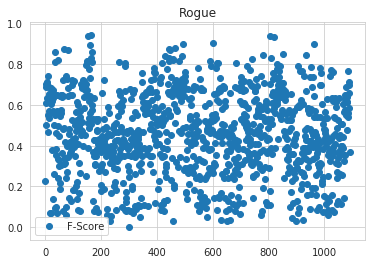

0.4283250066501091


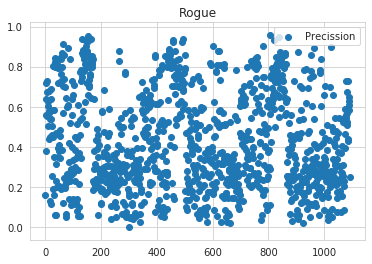

0.6183997721231048


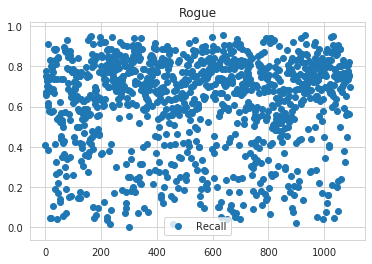


 **************** ROGUE 2 ********************** 

0.3622180681329988


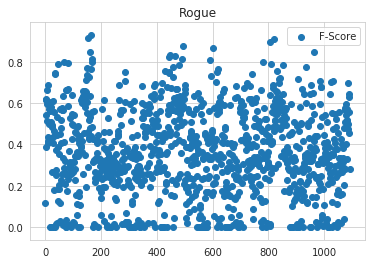

0.3373014103556651


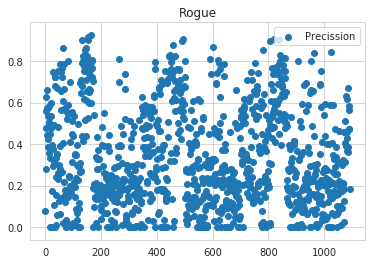

0.5181319505662701


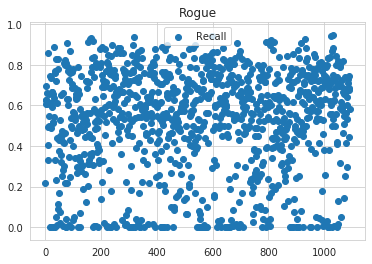


 **************** ROGUE L ********************** 

0.39741281796963024


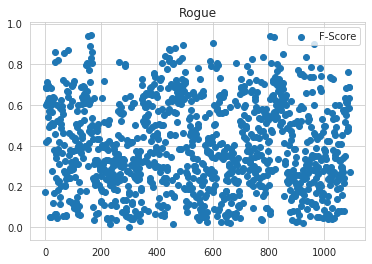

0.42534013115659297


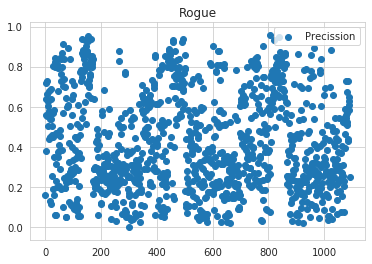

0.613633809931038


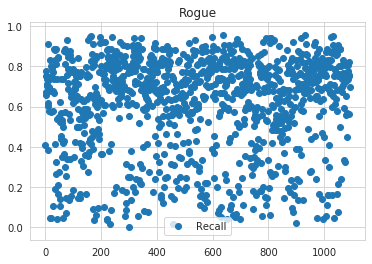

In [0]:

rouge = Rouge()
res_scores1=[]
res_scores2=[]
res_scoresL=[]
for i in  range(0,5000):
  if(len(gen_summaries[i])<6000 and len(data['summary'].iloc[i])<6000):
    scores = rouge.get_scores(gen_summaries[i], data['summary'].iloc[i])
    scores_1=scores[0]
    svalues_1 = list(scores_1.values())
    svalues_1 = svalues_1[0]
    res_scores1.append([svalues_1['f'], svalues_1['p'], svalues_1['r']])

    scores_2=scores[0]
    svalues_2 = list(scores_2.values())
    svalues_2 = svalues_2[1]
    # print(svalues)
    res_scores2.append([svalues_2['f'], svalues_2['p'], svalues_2['r']])

    scores_l=scores[0]
    svalues_l = list(scores_l.values())
    svalues_l = svalues_l[2]
    # print(svalues)
    res_scoresL.append([svalues_l['f'], svalues_l['p'], svalues_l['r']])


print("\n **************** ROGUE 1 ********************** \n")

plt.title("Rogue")
# plt.plot([pt[0] for pt in res_scores],label = 'F-Score')
plot_vals = [pt[0] for pt in res_scores1]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores1)), plot_vals,label = 'F-Score')
plt.legend()
plt.show()

plt.title("Rogue")
# plt.plot([pt[1] for pt in res_scores],label = 'Precission')
plot_vals = [pt[1] for pt in res_scores1]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores1)), plot_vals,label = 'Precission')
plt.legend()
plt.show()

plt.title("Rogue")
plot_vals = [pt[2] for pt in res_scores1]

print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores1)), plot_vals,label = 'Recall')
plt.legend()
plt.show()


print("\n **************** ROGUE 2 ********************** \n")

plt.title("Rogue")
# plt.plot([pt[0] for pt in res_scores],label = 'F-Score')
plot_vals = [pt[0] for pt in res_scores2]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores2)), plot_vals,label = 'F-Score')
plt.legend()
plt.show()

plt.title("Rogue")
# plt.plot([pt[1] for pt in res_scores],label = 'Precission')
plot_vals = [pt[1] for pt in res_scores2]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores2)), plot_vals,label = 'Precission')
plt.legend()
plt.show()

plt.title("Rogue")
plot_vals = [pt[2] for pt in res_scores2]

print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores2)), plot_vals,label = 'Recall')
plt.legend()
plt.show()


print("\n **************** ROGUE L ********************** \n")

plt.title("Rogue")
# plt.plot([pt[0] for pt in res_scores],label = 'F-Score')
plot_vals = [pt[0] for pt in res_scoresL]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scoresL)), plot_vals,label = 'F-Score')
plt.legend()
plt.show()

plt.title("Rogue")
# plt.plot([pt[1] for pt in res_scores],label = 'Precission')
plot_vals = [pt[1] for pt in res_scoresL]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scoresL)), plot_vals,label = 'Precission')
plt.legend()
plt.show()

plt.title("Rogue")
plot_vals = [pt[2] for pt in res_scoresL]

print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scoresL)), plot_vals,label = 'Recall')
plt.legend()
plt.show()

# plt.title('Box-Plot of Recall')
# plot_vals = [pt[2] for pt in res_scores]
# plt.boxplot(plot_vals)

# plt.title('Box-Plot of Precission')
# plot_vals = [pt[1] for pt in res_scores]
# plt.boxplot(plot_vals)

# plt.title('Box-Plot of F-Score')
# plot_vals = [pt[0] for pt in res_scores]
# plt.boxplot(plot_vals)



 **************** ROGUE 1 ********************** 

0.4581438825840103


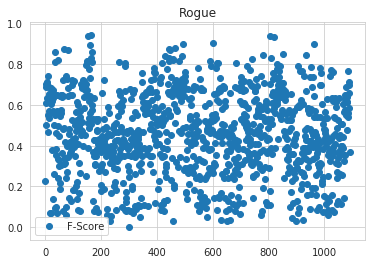

0.4283250066501091


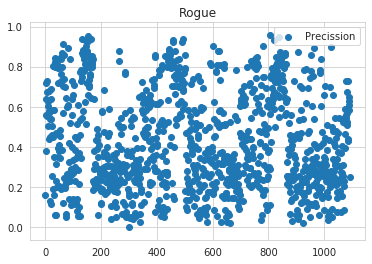

0.6183997721231048


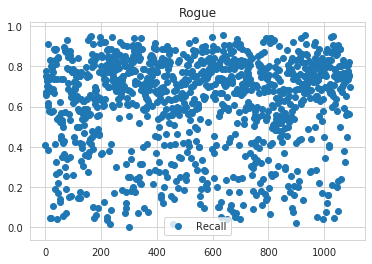


 **************** ROGUE 2 ********************** 

0.3622180681329988


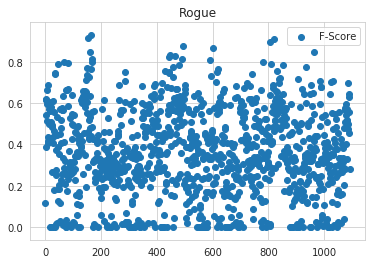

0.3373014103556651


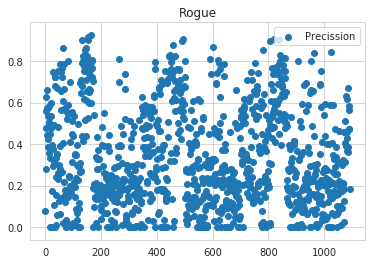

0.5181319505662701


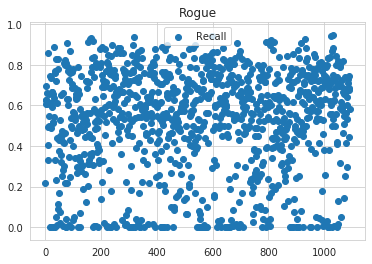


 **************** ROGUE L ********************** 

0.39741281796963024


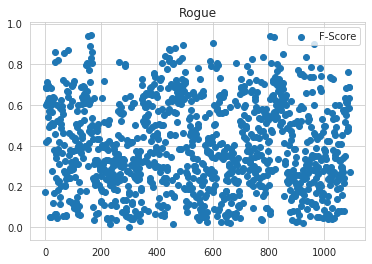

0.42534013115659297


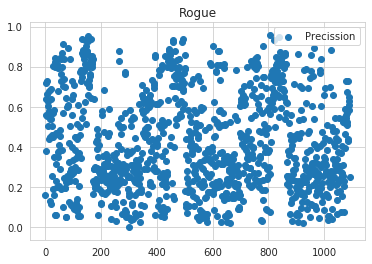

0.613633809931038


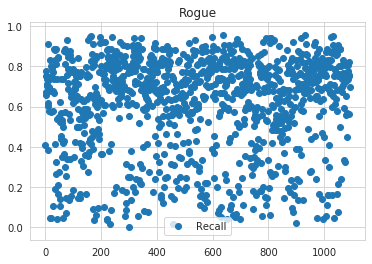

In [0]:
print("\n **************** ROGUE 1 ********************** \n")

plt.title("Rogue")
# plt.plot([pt[0] for pt in res_scores],label = 'F-Score')
plot_vals = [pt[0] for pt in res_scores1]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores1)), plot_vals,label = 'F-Score')
plt.legend()
plt.show()

plt.title("Rogue")
# plt.plot([pt[1] for pt in res_scores],label = 'Precission')
plot_vals = [pt[1] for pt in res_scores1]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores1)), plot_vals,label = 'Precission')
plt.legend()
plt.show()

plt.title("Rogue")
plot_vals = [pt[2] for pt in res_scores1]

print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores1)), plot_vals,label = 'Recall')
plt.legend()
plt.show()


print("\n **************** ROGUE 2 ********************** \n")

plt.title("Rogue")
# plt.plot([pt[0] for pt in res_scores],label = 'F-Score')
plot_vals = [pt[0] for pt in res_scores2]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores2)), plot_vals,label = 'F-Score')
plt.legend()
plt.show()

plt.title("Rogue")
# plt.plot([pt[1] for pt in res_scores],label = 'Precission')
plot_vals = [pt[1] for pt in res_scores2]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores2)), plot_vals,label = 'Precission')
plt.legend()
plt.show()

plt.title("Rogue")
plot_vals = [pt[2] for pt in res_scores2]

print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scores2)), plot_vals,label = 'Recall')
plt.legend()
plt.show()


print("\n **************** ROGUE L ********************** \n")

plt.title("Rogue")
# plt.plot([pt[0] for pt in res_scores],label = 'F-Score')
plot_vals = [pt[0] for pt in res_scoresL]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scoresL)), plot_vals,label = 'F-Score')
plt.legend()
plt.show()

plt.title("Rogue")
# plt.plot([pt[1] for pt in res_scores],label = 'Precission')
plot_vals = [pt[1] for pt in res_scoresL]
print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scoresL)), plot_vals,label = 'Precission')
plt.legend()
plt.show()

plt.title("Rogue")
plot_vals = [pt[2] for pt in res_scoresL]

print(np.mean(plot_vals))
plt.scatter(range(0, len(res_scoresL)), plot_vals,label = 'Recall')
plt.legend()
plt.show()

In [0]:

def topics_preprocess(topics):
  t=""
  for element in topics:
    t+=" ".join(element)
    t+=" "
  topics = t.split(" ")
  topics.remove('')
  topics = list(set(topics))
  return topics

In [0]:
def extract_sentences(input_sentence,topics):
  sentences_ind=[]
  dic = {}
  for j in range(len(input_sentence)):
    inter=0
    for i in range(len(topics)):
      temp = set(topics[i]).intersection(set(input_sentence[j][0].split(' ')))
      inter = max(inter, len(temp))
    sentences_ind.append(inter)
  # sentences_ind = set(sentences_ind)
  
  return sentences_ind


In [0]:
# intersection = extract_sentences(input_sentence, topics)

In [0]:
def makeDict(intersection):
  dic = {}
  for i in range(len(intersection)):
    if intersection[i] in dic:
      dic[intersection[i]].append(i)
    else:
      dic[intersection[i]] = [i]
  return dic

In [0]:
def predict(dic, input_sentence):
  predicted_sentences = []
  keys = sorted(dic.keys())
  keys.sort(reverse = True)
  indices = set()
  for key in keys:
    br = False
    for index in dic[key]:
      indices.add(index)
    
  for index in indices:
    predicted_sentences.append(input_sentence[index])
    if len(predicted_sentences) > 3:
      br = True
      break
    if br:
      break
  t = ''
  for element in predicted_sentences:
    t+=" ".join(element)
    t+=". "

  return t



{'boxes': [<matplotlib.lines.Line2D at 0x7f9e5c305908>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9e5c305e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e5c2e1978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e5c2e15f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9e5c3056a0>,
  <matplotlib.lines.Line2D at 0x7f9e5c305550>]}

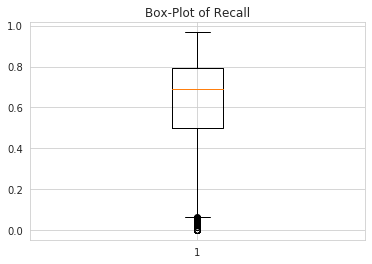

In [0]:
rouge = Rouge()
res_scores=[]
for i in  range(0,5000):
  # if(len(gen_summaries[i])<6000 and len(extractiveRecords['summary'].iloc[i])<6000):
  scores = rouge.get_scores(gen_summaries[i], data['summary'].iloc[i])
  scores=scores[0]
  svalues = list(scores.values())
  svalues = svalues[0]
  # print(svalues)
  res_scores.append([svalues['f'], svalues['p'], svalues['r']])

# plt.title("Rogue")
# print(len(res_scores))
# # plt.plot([pt[0] for pt in res_scores],label = 'F-Score')
# plot_vals = [pt[0] for pt in res_scores]
# plt.scatter(range(0, len(res_scores)), plot_vals,label = 'F-Score')
# plt.legend()
# plt.show()

# plt.title("Rogue")
# print(len(res_scores))
# # plt.plot([pt[1] for pt in res_scores],label = 'Precission')
# plot_vals = [pt[1] for pt in res_scores]
# plt.scatter(range(0, len(res_scores)), plot_vals,label = 'Precission')
# plt.legend()
# plt.show()

# plt.title("Rogue")
# print(len(res_scores))
# plot_vals = [pt[2] for pt in res_scores]
# plt.scatter(range(0, len(res_scores)), plot_vals,label = 'Recall')
# plt.legend()
# plt.show()

plt.title('Box-Plot of Recall')
plot_vals = [pt[2] for pt in res_scores]
plt.boxplot(plot_vals)

{'boxes': [<matplotlib.lines.Line2D at 0x7f9e5b80c908>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9e5b842358>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e5b842dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e5b842a58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9e5b80cc18>,
  <matplotlib.lines.Line2D at 0x7f9e5b80cf98>]}

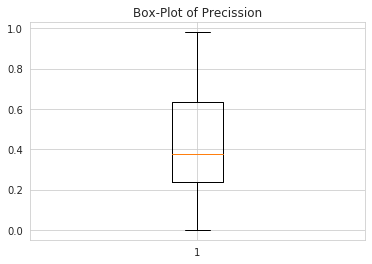

In [0]:
plt.title('Box-Plot of Precission')
plot_vals = [pt[1] for pt in res_scores]
plt.boxplot(plot_vals)

{'boxes': [<matplotlib.lines.Line2D at 0x7f9e5c1c0c88>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9e5c1b66d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9e5c1a4198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9e5c1b6dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9e5c1c0f98>,
  <matplotlib.lines.Line2D at 0x7f9e5c1b6358>]}

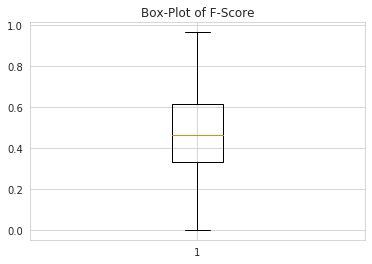

In [0]:
plt.title('Box-Plot of F-Score')
plot_vals = [pt[0] for pt in res_scores]
plt.boxplot(plot_vals)

In [0]:
pip install rouge

In [0]:

from rouge import Rouge